# Facial Emotion Recognition - CK+ dataset (7 emotion classes)

The goal of this comaprative study is to explore SVM, CNN-LSTM and a relatively novel RNN for facial emotion recognition purposes. 

Originally the study was to be focused on recognizing emotional responses from facial expressions in the wild (FEW) presented in videos using an extensive youtube videoset that was divided into image frames. Given computational restraints, however, the project was pivoted to utilize the CK+ datset only.

**Dataset**
* Inputs: Images of prelabeled faces; 
            Labeled according to CK+ research labels:
(i.e. 0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise)
<br><br/>
* Outputs: Classification labels; desc. above
* You can download the original dataset from this [link](http://www.pitt.edu/~emotion/ck-spread.htm).

**Performance metrics**
* Percentage of correctly labeled images (accuracy). 
* Validation loss over training loss. 

**Evaluation protocol**
* Linear SVM
* Fully-connected layers (CNN) 
* Pooling layers (CNN)

**CONTENTS:**

   1. [Data Preparation](#Prep)<br>
   a. [Import](#imp)<br>
   b. [Sorting](#sort)     
   c. [Exploration](#expl)<br></br>
   <br>
   2. [Feature Extraction](#extract)<br></br>
   <br>
   3. [Linear SVM](#SVM)<br>
   a. [Test/Train/Validate](#ttv1)<br>
   b. [Evaluation](#eval1)<br>
        - [Accuracy](#acc1)<br>
   <br>   
   4. [Fully Connected CNN](#FcCNN)<br>
   a. [CNN LeakyReLU (Dropout=0.3)](#LR_d_03)<br>
   b. [CNN ReLU (Dropout=0.3)](#R_d_03)<br>
   c. [CNN LeakyReLU (Dropout=0.5)](#LR_d_05)<br>
   d. [CNN LeakyReLU (L2 Regularizer)](#LR_L2)<br>
   e. [CNN LeakyReLU (L2 Regularizer f10)](#LR_L2_10)<br>
   f. [Model in action](#action)<br>
        - [Summary](#summ)<br>
   <br>   
   5. [CNN Pooling Layer](#pool)<br>
   a. [CNN - GAP](#gap)<br>
   b. [CNN - Average Pooling](#avg_pool)<br>
        - [Accuracy](#acc1)<br>

** **MORE REFERENCES TO BE ADDED**

<a id='Prep'></a>
# 1. Data preparation

<a id='imp'></a>
### a. Import

CK+ dataset was utilized as obtained from [here](http://www.consortium.ri.cmu.edu/ckagree/). The same labels emotions as: 

<br>
0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise
</br>

The dataset was small enough to be able to be downloaded and hosted locally on the computer used to run this experiment. The computer specs are the following:

**OS:** macOS High Sierra, MacBook Air (13-inch, Early 2015)
<br>**Processor:** 1.6 GHz Intel Core i5
<br>**Memory:** 8 GB 1600 MHz DDR3 
<br>**Startup Disk:** Macintosh HD
<br>**Graphics:** Intel HD Graphics 6000 1536 MB

Following we create a few helper functions to sort the images based on the labels provided by the research team that created the CK+ dataset.

The dataset is organized into several directories:
1. **FACS (Facial Action Coding System):**
    Uses Action Units *(AU)* that break down the facial expressions of humans based on the the individual muscle movements as defined by the FACS table provided in the appendix section of this notebook. You can also find the table in the appendix section of the full report. This directory contains folders with files that specify the numerical AU codes. We won't be referencing the same data directly, instead we will pull from the Emotion directory as described below.
    <br>
2. **Emotion:** 
    Here the AU codes are translated to emotions codes. The file names directly correspond to the image file names found in the cohn-kanade-images directory. The codes are represented in scientific notation, and we will turn them into integers for ease of labeling the images files. 
    <br>
3. **cohn-kanade-images:**
    The images themselves are stored in this directory.

Example file names:
<br>
Text file (emotion): S005_001_00000011_emotion.txt
Image file: S005_001_00000011.png
<br>
Following we create helper functions to copy and paste the image files into new folders (named after each emotion class). We do this by finding the text files and comparing their names - without "_emotion.txt" - to the image file name sans the filetype suffix. If there is a match we read the value of the text file and map it to the correct folder name.

Then we divide the files into train, test and validation folders. This makes it easier to read the labels and divide the different datasets for ML model manipulation. We are using a mechanism for reading the clsses that is similar to Pedro Marcelino's blog post ["Transfer learning from pre-trained models"](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751). In which we read the folder names as the labels.



In [10]:
import os
import shutil

# Copy/Paste and sort image files under appropriate labels 

# Read each file name from image folder and store to compare with file name 
#... from the text with classification number and copies an image file from the first
#... folder to a new folder sith subfolders with the emotion classification name.

TXT_DIR = ('/Users/eduardo_calzadilla/ML_NYU_JupyterFiles/Final/Emotion')
IMG_DIR = ('/Users/eduardo_calzadilla/ML_NYU_JupyterFiles/Final/cohn-kanade-images')


def match_file(img_directory=None, file=None, txt_dirpath=None):
    file_n = os.path.splitext(file)[0]
    file_n = file_n.split('_emotion')[0]
    file_n = os.path.join(file_n + '.png')
    for cur_path, folders, img_files in os.walk(img_directory):
        if file_n in img_files:
            IMG_PATH_f = cur_path
            TXT_PATH_s = IMG_PATH_f[:IMG_PATH_f.index("cohn-kanade-images")]
            IMG_PATH = os.path.join(IMG_PATH_f, file_n)
            TXT_PATH = os.path.join(txt_dirpath, file)
            return IMG_PATH, TXT_PATH

        
def get_number(path=None, file=None):
    file = open(path)
    value = file.readlines()
    file.close()
    for v in value:
        v = v.split(".")
        return int(v[0])

    
def copy_paste(path=None, file=None, num=None, txt_path=None):
    v_list = [0,1,2,3,4,5,6,7]
    emo_list = ['0_neutral','anger','contempt',
              'disgust', 'fear', 'happy','sadness','surprise']
    for v in v_list:
        if v == num:
            folder = emo_list[v]
            dst = '/Users/eduardo_calzadilla/ML_NYU_JupyterFiles/Final/fer/temp'
            dst = os.path.join(dst, str(folder))
            src = path
            shutil.copy(src, dst) # Store copy in dst

# Read files in the text folder
for dirpath, dirnames, files in os.walk(TXT_DIR):
    for file in files:
#         print(dirpath)
#         print(IMG_DIR)
#         print(file)
        if not file.startswith('.'):
            IMG_PATH, TXT_PATH = match_file(img_directory=IMG_DIR, file=file,
                              txt_dirpath=dirpath)
            # Get classification number
            cl_number = get_number(path=TXT_PATH, file=file)
            # Copy and paste to temp
            copy_paste(path=IMG_PATH, file=file, num=cl_number, txt_path=TXT_PATH)
    
# '''Structure:
#     One function:
#     Look for file match in image folder when
#     compared to the classification folder filename.
#     Once found, read the .txt file to get classification.
    
#     Helper function 1:
#     For the classification value in the .txt file
#     copy and paste the filename into a new folder that
#     matches the emotion stored according to the index 
#     of the emotions list. 
    
#     Helper function 2: IF TIME ALLOWS
#     Create temp folder that stores all images according
#     to the emotion. 
    
#     Another function:
#     Read images sorted according to labeled emotions and
#     randomly pick a percentage of all of each to copy and 
#     paste into the new (same labelled folders) that are
#     stored in the train, test, and validate folders.
    
#     Another function:
#     Print the amount of images contained in each (train, test,
#     validate) folder and each emotion folder.'''

<a id='sort'> </a>

### b. Sorting

Now we create helper functions to select a specified percentage of files and sort them into test, train and validate subdirectories. 

In [20]:
import random

# Randomly sort images into train, test, validate folders

def train_test_val_split(subdir=None, sample_size=None, to_dir=None):
    # The sample size defines the percent of files that are sorted
    #...into test and validate folders, the remainder is for train subdir
    #...to_dir shoud be the directory conatining the test, train, validate folders
    all_folders = os.listdir(subdir)
    emotion_fol = []
    # Recreate list, ignore .DS_Store
    for e in all_folders:
        if not e.startswith('.'):
            emotion_fol.append(e)
#     print(emotion_fol)
    train_sub = os.path.join(to_dir + "/train")
    test_sub = os.path.join(to_dir + "/test")
    val_sub = os.path.join(to_dir + "/validate")
    
    val_sample = sample_size-0.05
    train_sample = 1 - (sample_size+val_sample)
    dir_list = [train_sub, test_sub, val_sub]
    perc_list = [train_sample, sample_size, sample_size]
#     print(len(perc_list))
#     print(perc_list[2])
    for e in emotion_fol:
        for d in dir_list:
            files = os.listdir(os.path.join(subdir, e))
            num_files = len(files)
#             print(e) # get index instead of using i, runs hree times for each folder
            for to_copy in random.sample(files, int(num_files*perc_list[dir_list.index(d)])):
#                 print(to_copy)
#                 print(int(num_files*perc_list[dir_list.index(d)]))
#                 print(perc_list[dir_list.index(d)])
                if not to_copy.startswith('.'):            
                    shutil.copy(os.path.join(subdir, e, to_copy), os.path.join(d, e))
    sizes = []
    files_corr = []
    for d in dir_list:
        num_files = 0
        for e in emotion_fol:
#                 print(e)
#                 print(d)
            files = os.listdir(os.path.join(d, e))
#                 if not files.startswith('.'):
#                 print(os.path.join(d, e))
            for file in files:
                if not file.startswith('.'):
#                     print(file)
                    files_corr.append(file)
#                     print(files_corr)
#                 print(len_file)
#             print()
            len_file = len(files_corr)
#             print(len_file)
            num_files += len_file
            files_corr = []
#                 print(files)
#                 print(num_files)
        sizes.append(num_files)
#         print(sizes)
    train_size = sizes[0]
    test_size = sizes[1]
    validation_size = sizes[2]
    print('Training files: ', train_size)
    print('Testing files: ', test_size)
    print('Validation files: ', validation_size)
    return  train_size, test_size, validation_size

subdir = '/Users/eduardo_calzadilla/ML_NYU_JupyterFiles/Final/fer/temp'
to_dir = '/Users/eduardo_calzadilla/ML_NYU_JupyterFiles/Final/fer/data'

train_size, test_size, validation_size  = train_test_val_split(subdir=subdir,
                                                sample_size=0.2, to_dir=to_dir)

train_size, test_size, validation_size


Training files:  209
Testing files:  64
Validation files:  62


(209, 64, 62)

Here we can see that the files were redistributed properly and the sample sizes were stored. 

<a id='expl'> </a>

### c. Exploration

Now let's take a view of the different pictures, to get a better understanding of what the models will be classifying.

In [28]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Base variables
# to_dir is now base_dir
base_dir = to_dir

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

train_anger_dir = os.path.join(train_dir, 'anger')
train_contempt_dir = os.path.join(train_dir, 'contempt')
train_disgust_dir = os.path.join(train_dir, 'disgust')
train_fear_dir = os.path.join(train_dir, 'fear')
train_happy_dir = os.path.join(train_dir, 'happy')
train_sadness_dir = os.path.join(train_dir, 'sadness')
train_surprise_dir = os.path.join(train_dir, 'surprise')


img_width, img_height = 224, 224  # Default input size for VGG16

# train_dir

In [29]:
import sys
from PIL import Image
sys.modules['Image'] = Image

from PIL import Image
print(Image.__file__)

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/PIL/Image.py


In [30]:
import Image
print(Image.__file__)

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/PIL/Image.py


ANGER:


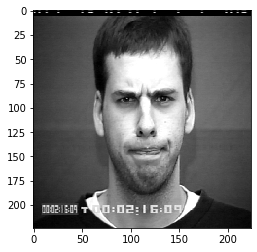

SURPRISE:


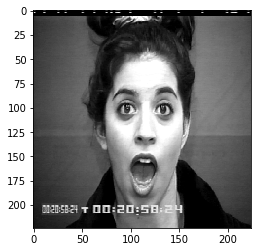

HAPPY:


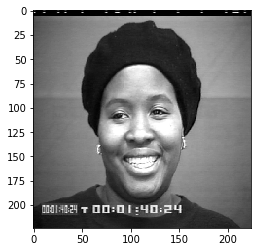

FEAR:


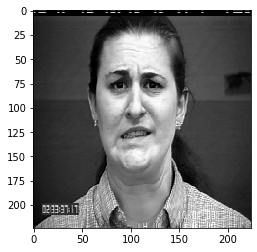

ANGER:


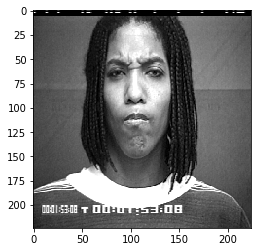

SURPRISE:


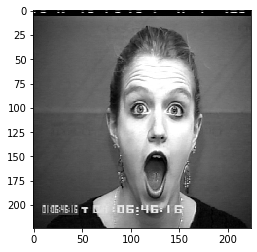

HAPPY:


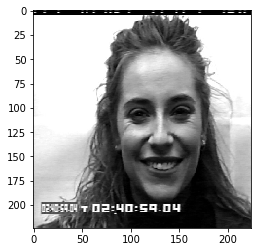

FEAR:


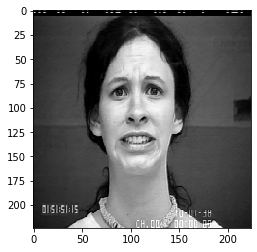

In [60]:
# Show pictures 

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    print('ANGER:')
    show_pictures(train_anger_dir)
    print('SURPRISE:')
    show_pictures(train_surprise_dir)
    print('HAPPY:')
    show_pictures(train_happy_dir)
    print('FEAR:')
    show_pictures(train_fear_dir)
    
    

Above we can see that the images were read correctly and we can continue with extracting the facial features.

<a id='extract'> </a>

## 2. Feature extraction

For this project we will use pre-trained models, given time and computational contraints. First we will use a linear SVM classifier as it has been shown to be a good facial emotion classifier, and will be used as a baseline for our comparison.

We will use models that are composed of two parts:
* Convolutional base.
* Classifier.

First let's pass our images through it for feature extraction.

We will use the convolutional base to extract features, using them to train a classifier to classify the input image as one of the predefined emotions. 

This means the features extracted from the convolutional base will be the same used for all classifiers studied in this example. The convolutional base will be adopted from a pretrained model.

Now let's see how to extract features from a convolutional base. The pretrained model we are using is VGG16 (Visual Geometry Group developed by Oxford). The weights passed are those from ImageNet as they are used for our purposes.

In [32]:
# Instantiate convolutional base
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))  # 3 = number of channels in RGB picturesValueError: could not broadcast input array from shape (21,7,7,512) into shape (32,7,7,512)

Ok, now that we have the convolutional base, we need to pass our images through it for feature extraction.

In [33]:
# Check architecture
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [379]:
# Extract features
import scipy
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    start_time = time.time()

    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count, 8))
#     print(sample_count, 7, 7, 512)

    # Preprocess data - flow_from_directory allows us to extract 
    #... features and labels directly from a directory
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')

    i = 0
    for inputs_batch, labels_batch in generator:
#         print('Input batch shape: ', inputs_batch.shape)
        features_batch = conv_base.predict(inputs_batch)
#         print('Features batch shape: ', features_batch.shape)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size,:] = labels_batch
#         print('Features shape: ', features.shape)
#         print('Labels batch shape: ', labels_batch.shape) 
        i += 1
        if i * batch_size >= sample_count:
            break
    end_time = time.time()
    print("Total execution time: {:.2f}".format(end_time - start_time),'s')
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)


Found 209 images belonging to 8 classes.
Total execution time: 233.02 s
Found 62 images belonging to 8 classes.
Total execution time: 63.29 s
Found 64 images belonging to 8 classes.
Total execution time: 61.75 s


In [380]:
print(train_features.shape) 
print(train_labels.shape)


(209, 7, 7, 512)
(209, 8)


In [890]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))
# print(svm_labels)


In [37]:
# Debug - removed for in the interest of concisness for grading
# print(train_features)
# print(train_labels)

<a id='SVM'></a>

## 3. SVM

Again, we will first start with the SVM model for base comparison.

In [897]:
# # Debug - removed for in the interest of concisness for grading
# # Build model
# import sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import LinearSVC

# # print(svm_features.shape) # use this shape below 
# X_train, y_train = svm_features.reshape(271,7*7*512), svm_labels
# print(X_train.shape)
# print(y_train.shape)


# param = [{
#           "C": [0.01, 0.1, 1, 10, 100]
#          }]
 
# svm = LinearSVC(penalty='l2', loss='squared_hinge')
# clf = GridSearchCV(svm, param, cv=10)
# clf.fit(X_train, y_train)

**Because of time constraints - the dataset used is too small,as can be seen from the Convergence Warnings. For further work it is advised to use distributed computing to handle a much larger dataset.**

In [889]:
# Save model
# clf.save('fer_svm.h5')

In [43]:
# Evaluate model - INTERRUPTED DUE TO TIME CONSTRAINTS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("\nAccuracy score (mean):")
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
print("\nAccuracy score (standard deviation):")
print(np.std(cross_val_score(clf, X_train, y_train, cv=10)))


Accuracy score (mean):


/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

0.7272486772486773

Accuracy score (standard deviation):


/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

0.11389833672074295


/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The above scripts could have been run with the warnings skipped, however, in the interest of time they were kept in order to gather more insight on possible performance. For clarity of the results, since the warnings breakup the same - the values are as follows:

**Accuracy score (mean):**
0.72

**Accuracy score (standard deviation):**
0.11

One assumption we can make because of the Convergence Warnings, is that the program is letting us know that the dataset is too small. However, it is important to note that there might be other reasons for the warning, including but not limited to:
1. The model might not be suitable for this task. Given examples detailed in literature, we assume this not to be the case as SVMs have been shown to handle FER appropriately, as shown in [Yu-Dong Zhangs' et al. paper](https://ieeexplore.ieee.org/document/7752782). However, an RBF SVM or other type of SVM might be more suitable given that the 
2. The problem is not well conditioned, which can be due to poor scaling of the decision variables. And this can be handled, by normalizing, for example by using [Scikit-Learn's StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. The search used fro GridSearch might have been innapropriate, given that the above took about 4 hours to run and there was not enough time to run other search types, then the same is proposed for future work. 

We will however, take this validation accuracy as a baseline for comparison.



/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_splits=10 cannot be greater than the number of members in each class.

  FitFailedWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarn

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_calzadilla/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/eduardo_c

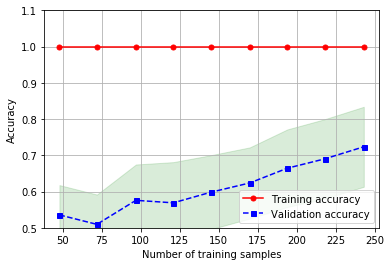

In [44]:
# Plot learning curves --- NOT RUN DUE TO TIME CONSTRAINTS
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='red', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='blue', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

<a id='FcCNN'></a>
## 4. Fully Connected CNN

The following is a model built on fully connected layers.

ReLu activation functions have been shown to produce favorable performance for facial emotion detection in literature and other experiments - so we will choose the same. 

<a id='LR_d_03'></a>

### a. CNN LeakyReLU (Dropout=0.3)

In [868]:
# Define model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
acc_list_dic = []
loss_list_dic = []
models_list = []

epochs = 100

cnn_base = models.Sequential() 
cnn_base.add(layers.Flatten(input_shape=train_features.shape[1:])) 
cnn_base.add(layers.Dense(100, activation=layers.LeakyReLU(alpha=0.3))) 
cnn_base.add(layers.Dropout(0.5)) 
cnn_base.add(layers.Dense(50, activation=layers.LeakyReLU(alpha=0.3))) 
cnn_base.add(layers.Dropout(0.3)) 
cnn_base.add(layers.Dense(8, activation='softmax',input_shape=(50,)))

cnn_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_94 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_290 (Dense)            (None, 100)               2508900   
_________________________________________________________________
dropout_150 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_291 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_151 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_292 (Dense)            (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [869]:
# Compile model
cnn_base.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

# models_list.append(cnn_base)

In [708]:
# Train model
history = cnn_base.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 9s 42ms/step - loss: 4.6020 - acc: 0.2010 - val_loss: 2.1520 - val_acc: 0.3226
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 3.6786 - acc: 0.2679 - val_loss: 1.2891 - val_acc: 0.5484
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 2.6938 - acc: 0.3541 - val_loss: 1.2650 - val_acc: 0.5323
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 2.0932 - acc: 0.4689 - val_loss: 0.9519 - val_acc: 0.6613
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 1.8442 - acc: 0.4880 - val_loss: 0.8059 - val_acc: 0.7419
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 1.4335 - acc: 0.6029 - val_loss: 0.8650 - val_acc: 0.7258
Epoch 7/100
209/209 [==============================] - 1s 2ms/step - loss: 1.3824 - acc: 0.6316 - val_loss: 0.8743 - val_acc: 0.7097
Epoch 8/100
209/209 [==

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3490 - acc: 0.8947 - val_loss: 1.1507 - val_acc: 0.8065
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3327 - acc: 0.8995 - val_loss: 1.1237 - val_acc: 0.7903
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 0.2445 - acc: 0.9234 - val_loss: 1.2141 - val_acc: 0.8226
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3600 - acc: 0.8900 - val_loss: 1.3074 - val_acc: 0.7903
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 0.1702 - acc: 0.9569 - val_loss: 1.3973 - val_acc: 0.8226
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 0.4410 - acc: 0.8756 - val_loss: 1.2869 - val_acc: 0.8065
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3610 - acc: 0.8852 - val_loss: 1.3273 - val_acc: 0.8065
Epoch 69/100
209/209 [==============================] - 0s 2ms

In [709]:
# Save model
# model.save('fer_cvm.h5')

#### Learning curves

In [710]:
# Plot results
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import copy
import plotly.graph_objects as go

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

def show_fig(data=None, x=None, colors=None, y_title=None, plot_title=None):
    i_v = 0
    i = 0
    fig_data = []
    v_max = 0
    v_min = 0
    
    # Make deep copy to avoid mutating original dict
    data_per = copy.deepcopy(data) 
        
    # Create Scatter traces in plotly for amount of keys
    for k, v in data_per.items():
        fig_data.append(go.Scatter(x=x, y=v,
                        line=dict(color=colors[i]),
                        name=k))
        i+=1
        
        v_m = max(v)
        v_n = min(v)
        if v_m > v_max:
            v_max = v_m
        if v_n < v_min:
            v_min = v_n
    
    #Layout properties
    layout = go.Layout(
                title=dict(text=plot_title,
                            xanchor='center',
                            x=0.5,
                            yanchor='top'),
                xaxis=dict(title='Epochs',
                           showgrid=False,
                           zeroline=False),            
                yaxis=dict(title= y_title,
                           gridcolor='LightGrey',
                           zeroline=False),
                plot_bgcolor='rgba(0,0,0,0)',
                legend=dict(y=-0.15, orientation='h'))

    fig = go.Figure(data=fig_data, layout=layout)
    fig.update_xaxes(range=[(min(x)-6*min(x)), (max(x)+0.05*max(x))])
    fig.update_yaxes(range=[(v_min-0.05*(v_max)), 1.05*(v_max)])
    fig.show()

    
colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')



This fully-connected layer, model with Leaky ReLU activation performed well, with some overfitting expected given the higher validation loss when compared to training loss.

Let's try a ReLU activation and see if there are any changes, and then let's try increasing the last dropout layer. 

<a id='R_d_03'></a>

### b. CNN ReLU (Droupout=0.3)

In [711]:
# Define model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# models_list.append('CNN ReLU (Droupout=0.3)')

epochs = 100

model = models.Sequential() 
model.add(layers.Flatten(input_shape=train_features.shape[1:])) 
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(50, activation='relu')) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(8, activation='softmax',input_shape=(50,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_76 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_239 (Dense)            (None, 100)               2508900   
_________________________________________________________________
dropout_122 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_240 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_123 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_241 (Dense)            (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [712]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [713]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 6s 30ms/step - loss: 2.6499 - acc: 0.1627 - val_loss: 1.7879 - val_acc: 0.2419
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 1.9856 - acc: 0.2153 - val_loss: 1.8619 - val_acc: 0.3065
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 1.9671 - acc: 0.1914 - val_loss: 1.7281 - val_acc: 0.4032
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 1.8857 - acc: 0.2392 - val_loss: 1.6704 - val_acc: 0.4677
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 1.8771 - acc: 0.2679 - val_loss: 1.7434 - val_acc: 0.4032
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 1.7999 - acc: 0.2727 - val_loss: 1.5661 - val_acc: 0.3710
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 1.6854 - acc: 0.3301 - val_loss: 1.5392 - val_acc: 0.5484
Epoch 8/100
209/209 [==

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1352 - acc: 0.5550 - val_loss: 0.6897 - val_acc: 0.7581
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1596 - acc: 0.5215 - val_loss: 0.7958 - val_acc: 0.7258
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 1.0735 - acc: 0.6029 - val_loss: 0.7263 - val_acc: 0.7419
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1273 - acc: 0.5694 - val_loss: 0.7397 - val_acc: 0.7258
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1525 - acc: 0.5263 - val_loss: 0.7680 - val_acc: 0.7258
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1246 - acc: 0.5598 - val_loss: 0.7594 - val_acc: 0.7258
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 1.0994 - acc: 0.5742 - val_loss: 0.7235 - val_acc: 0.7419
Epoch 69/100
209/209 [==============================] - 0s 2ms

In [714]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')

# acc_list_dic.append(acc_data)
# loss_list_dic.append(loss_data)

As expected the ReLu activation function has a lower accuracy performance, but the same is less likely to lead to overfitting.

Considering out training dataset is small, only 209 images, it might be beneficial to choose a model that can be more broadly applied. 

Let's try starteges to reduce overfitting, starting with changing the last droupout layer for the CNN which used the Leaky ReLU activation function. As it has been shown that increasing dropout can decrease overfitting, such as shown in Srivastava's et al. paper ['Dropout: A Simple Way to Prevent Neural Networks from
Overfitting'](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

<a id='LR_d_05'></a>

### c. CNN LeakyReLU (Droupout=0.5)

In [870]:
models_list = []
acc_list_dic = []
loss_list_dic = []

# Define model
models_list.append('CNN LeakyReLU (Droupout=0.5)')

epochs = 100

cnn_LR = models.Sequential() 
cnn_LR.add(layers.Flatten(input_shape=train_features.shape[1:])) 
cnn_LR.add(layers.Dense(100, activation=layers.LeakyReLU(alpha=0.3))) 
cnn_LR.add(layers.Dropout(0.5)) 
cnn_LR.add(layers.Dense(50, activation=layers.LeakyReLU(alpha=0.3))) 
cnn_LR.add(layers.Dropout(0.5)) 
cnn_LR.add(layers.Dense(8, activation='softmax',input_shape=(50,)))

cnn_LR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_95 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_293 (Dense)            (None, 100)               2508900   
_________________________________________________________________
dropout_152 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_294 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_153 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_295 (Dense)            (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [871]:
# Compile model
cnn_LR.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [872]:
# Train model
history = cnn_LR.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 10s 47ms/step - loss: 5.7751 - acc: 0.1722 - val_loss: 2.7958 - val_acc: 0.2903
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 5.4080 - acc: 0.1914 - val_loss: 1.5994 - val_acc: 0.3871
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 3.7007 - acc: 0.2967 - val_loss: 1.0534 - val_acc: 0.6452
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 2.6846 - acc: 0.3684 - val_loss: 1.1322 - val_acc: 0.5806
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 2.5767 - acc: 0.4163 - val_loss: 1.0144 - val_acc: 0.6452
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 2.0556 - acc: 0.4306 - val_loss: 1.3189 - val_acc: 0.5968
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 1.9596 - acc: 0.5455 - val_loss: 0.8760 - val_acc: 0.6935
Epoch 8/100
209/209 [=

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3740 - acc: 0.8804 - val_loss: 0.8911 - val_acc: 0.8226
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3765 - acc: 0.8804 - val_loss: 0.9035 - val_acc: 0.8387
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3718 - acc: 0.8852 - val_loss: 0.8730 - val_acc: 0.8548
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 0.2957 - acc: 0.8995 - val_loss: 1.3907 - val_acc: 0.8226
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3336 - acc: 0.9043 - val_loss: 1.0697 - val_acc: 0.8226
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3370 - acc: 0.8804 - val_loss: 1.1580 - val_acc: 0.8065
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3208 - acc: 0.9234 - val_loss: 1.2469 - val_acc: 0.7903
Epoch 69/100
209/209 [==============================] - 0s 2ms

In [873]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')

acc_list_dic.append(acc_data)
loss_list_dic.append(loss_data)


Increasing the droupout layer strength did not provide significant improvement for overfitting, so now we will add the L2 activity regularizer on the dense layers and see how the new model performs.

This was implemented by following the steps outlined in the blog post: ['How to Reduce Generalization Error With Activity Regularization in Keras'](https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/).



<a id='LR_L2'></a>

### d. CNN LeakyReLU (L2 Regularizer)

In [874]:
from tensorflow.keras.regularizers import l2

# Define model
models_list.append('CNN LeakyReLU (L2 Regularizer)')
epochs = 100

cnn_L2 = models.Sequential() 
cnn_L2.add(layers.Flatten(input_shape=train_features.shape[1:])) 
cnn_L2.add(layers.Dense(100, activation=layers.LeakyReLU(alpha=0.3), 
                       activity_regularizer=l2(0.001))) 
cnn_L2.add(layers.Dropout(0.5)) 
cnn_L2.add(layers.Dense(50, activation=layers.LeakyReLU(alpha=0.3), 
                       activity_regularizer=l2(0.001))) 
cnn_L2.add(layers.Dropout(0.5)) 
cnn_L2.add(layers.Dense(8, activation='softmax',input_shape=(50,)))

cnn_L2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_96 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_296 (Dense)            (None, 100)               2508900   
_________________________________________________________________
dropout_154 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_297 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_155 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_298 (Dense)            (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [875]:
# Compile model
cnn_L2.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])


In [876]:
# Train model
history = cnn_L2.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))


Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 8s 39ms/step - loss: 10.5819 - acc: 0.1340 - val_loss: 7.8392 - val_acc: 0.3710
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 8.1081 - acc: 0.2249 - val_loss: 4.2066 - val_acc: 0.4516
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 4.6076 - acc: 0.3206 - val_loss: 2.9957 - val_acc: 0.6935
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 3.5213 - acc: 0.4306 - val_loss: 2.7234 - val_acc: 0.6935
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 3.0647 - acc: 0.4306 - val_loss: 2.3766 - val_acc: 0.7097
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 2.5891 - acc: 0.5311 - val_loss: 2.2074 - val_acc: 0.7581
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 2.3798 - acc: 0.6268 - val_loss: 2.0391 - val_acc: 0.6935
Epoch 8/100
209/209 [=

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 1.5607 - acc: 0.9282 - val_loss: 1.6641 - val_acc: 0.7903
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 1.7221 - acc: 0.8708 - val_loss: 1.8566 - val_acc: 0.7903
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 1.7627 - acc: 0.8804 - val_loss: 1.8636 - val_acc: 0.8226
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 1.9338 - acc: 0.8756 - val_loss: 1.8135 - val_acc: 0.8387
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 2.2137 - acc: 0.8325 - val_loss: 2.0113 - val_acc: 0.7903
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 2.1926 - acc: 0.8660 - val_loss: 2.2586 - val_acc: 0.7903
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 1.9451 - acc: 0.8660 - val_loss: 1.9529 - val_acc: 0.8226
Epoch 69/100
209/209 [==============================] - 0s 2ms

In [877]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')

acc_list_dic.append(acc_data)
loss_list_dic.append(loss_data)

Here we can see that the likelihood of overfitting has been reduced significantly. For curiosity let's see the effect of increasing the regularization by a factor of 10.


<a id='LR_L2_10'></a>

### e. CNN LeakyReLU (L2 Regularizer f10)

In [734]:
# Define model

epochs = 100

model = models.Sequential() 
model.add(layers.Flatten(input_shape=train_features.shape[1:])) 
model.add(layers.Dense(100, activation=layers.LeakyReLU(alpha=0.3), 
                       activity_regularizer=l2(0.01))) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(50, activation=layers.LeakyReLU(alpha=0.3), 
                       activity_regularizer=l2(0.01))) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(8, activation='softmax',input_shape=(50,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_82 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_257 (Dense)            (None, 100)               2508900   
_________________________________________________________________
dropout_134 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_258 (Dense)            (None, 50)                5050      
_________________________________________________________________
dropout_135 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_259 (Dense)            (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [735]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])


In [736]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))


Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 7s 35ms/step - loss: 69.7487 - acc: 0.1627 - val_loss: 62.1302 - val_acc: 0.3226
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 61.1702 - acc: 0.1244 - val_loss: 23.1023 - val_acc: 0.3710
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 20.4184 - acc: 0.1866 - val_loss: 14.5645 - val_acc: 0.3548
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 13.5966 - acc: 0.1531 - val_loss: 10.6456 - val_acc: 0.1774
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 10.1175 - acc: 0.2297 - val_loss: 6.9956 - val_acc: 0.5161
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 6.4887 - acc: 0.2153 - val_loss: 5.0721 - val_acc: 0.4677
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 4.9578 - acc: 0.2967 - val_loss: 4.3245 - val_acc: 0.4839
Epoch 8/100
20

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 3.9868 - acc: 0.5646 - val_loss: 3.7031 - val_acc: 0.6290
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 3.7138 - acc: 0.6029 - val_loss: 3.7391 - val_acc: 0.6290
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 3.4570 - acc: 0.5598 - val_loss: 3.4109 - val_acc: 0.6774
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 3.3507 - acc: 0.5407 - val_loss: 3.2926 - val_acc: 0.6452
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 3.2774 - acc: 0.6124 - val_loss: 3.3870 - val_acc: 0.6774
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 3.4787 - acc: 0.5933 - val_loss: 3.4014 - val_acc: 0.6613
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 3.5333 - acc: 0.5263 - val_loss: 4.0447 - val_acc: 0.7742
Epoch 69/100
209/209 [==============================] - 0s 2ms

In [737]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')


Here we see that increasing the L2 regularization factor, only marginally reduces the likelihood of overfitting, while significantly reducing the accuracy performance. 

Because our test dataset is small at 209 images, and we built the classifier over the pretrained VGG16 model, then a mix of low generalization likelihood and high prediction accuracy is prefered.

Therefore the 'CNN LeakyReLU (Droupout=0.5)' (which has no regularization parameter) and the 'CNN LeakyReLU (Droupout=0.5)' (which does have the L2 regularizer) are the preferred models. 

Let's continue by seeing both of these models in predictive action and then compare accuracy and loss values in a table. 

<a id='sum'></a>
#### Summary

Let's summarize the results of the two best performing models in a table to better select the best performing model.

In [879]:
# models_list = []

temp_dic = acc_list_dic.copy()
# print(type(acc_list_dic))
# print(type(temp_dic))
df_e = pd.DataFrame.from_dict({'Epoch':epochs})


# Get CNN LeakyReLU (Droupout=0.5) dataframe
cnn_LR_acc = pd.DataFrame.from_dict(temp_dic[0])
ccn_LR_max = cnn_LR_acc['Training accuracy'].max()
LR_idx = np.where(cnn_LR_acc['Training accuracy'] == np.amax(cnn_LR_acc['Training accuracy']))
ccn_LR_max_v = cnn_LR_acc['Validation accuracy'].max()
LR_idx_v = np.where(cnn_LR_acc['Validation accuracy'] == np.amax(cnn_LR_acc['Validation accuracy']))
ccn_LR_std = cnn_LR_acc['Training accuracy'].std()
ccn_LR_std_v = cnn_LR_acc['Validation accuracy'].std()
ccn_LR_dic = {'Model': models_list[0],
              'Training Accuracy Max':ccn_LR_max, 
              'Training Accuracy Std':ccn_LR_std,
              'Best Training Epoch':epochs[int(LR_idx[0][0])],
              'Validation Accuracy Max':ccn_LR_max_v,
              'Validation Accuracy Std':ccn_LR_std_v,
              'Best Validation Epoch':epochs[int(LR_idx_v[0][0])] 
             }

# Get CNN LeakyReLU (L2 Regularizer) dataframe
cnn_L2_acc = pd.DataFrame.from_dict(temp_dic[1])
ccn_L2_max = cnn_L2_acc['Training accuracy'].max()
L2_idx = np.where(cnn_L2_acc['Training accuracy'] == np.amax(cnn_L2_acc['Training accuracy']))
ccn_L2_max_v = cnn_L2_acc['Validation accuracy'].max()
L2_idx_v = np.where(cnn_L2_acc['Validation accuracy'] == np.amax(cnn_L2_acc['Validation accuracy']))
ccn_L2_std = cnn_L2_acc['Training accuracy'].std()
ccn_L2_std_v = cnn_L2_acc['Validation accuracy'].std()
ccn_L2_dic = {'Model': models_list[1],
              'Training Accuracy Max':ccn_L2_max, 
              'Training Accuracy Std':ccn_L2_std,
              'Best Training Epoch':epochs[int(L2_idx[0][0])],
              'Validation Accuracy Max':ccn_L2_max_v,
              'Validation Accuracy Std':ccn_L2_std_v,
              'Best Validation Epoch':epochs[int(L2_idx_v[0][0])]
             }

# Construct full table
cnn_LR_acc_df = pd.DataFrame(ccn_LR_dic, index=[0])
cnn_L2_acc_df = pd.DataFrame(ccn_L2_dic, index=[1])

cnn_summ_df = pd.concat([cnn_LR_acc_df, cnn_L2_acc_df])
cnn_summ_df


,Model,Training Accuracy Max,Training Accuracy Std,Best Training Epoch,Validation Accuracy Max,Validation Accuracy Std,Best Validation Epoch
0,CNN LeakyReLU (Droupout=0.5),0.952153,0.163155,87,0.854839,0.079157,64
1,CNN LeakyReLU (L2 Regularizer),0.956938,0.143746,99,0.838710,0.062203,53


<a id='pool'></a>
### 5. CNN - Pooling layer

Now instead of passing on the convolutional layer as fully connected we will add a global average pooling layer and feed its output into a softmax activated layer.

<a id='gap'></a>
### a. CNN - GAP

In [880]:
# Define model
models_list = []
acc_list_dic = []
loss_list_dic = []

models_list.append('CNN - GAP Base')

epochs = 100

gap = models.Sequential()
gap.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
gap.add(layers.Dense(8, activation='softmax'))
gap.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_299 (Dense)            (None, 8)                 4104      
Total params: 4,104
Trainable params: 4,104
Non-trainable params: 0
_________________________________________________________________


In [881]:
# Compile model
gap.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [882]:
# Train model
history = gap.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 8s 36ms/step - loss: 0.4254 - acc: 0.8750 - val_loss: 0.3927 - val_acc: 0.8750
Epoch 2/100
209/209 [==============================] - 0s 343us/step - loss: 0.3792 - acc: 0.8750 - val_loss: 0.3576 - val_acc: 0.8750
Epoch 3/100
209/209 [==============================] - 0s 427us/step - loss: 0.3529 - acc: 0.8750 - val_loss: 0.3421 - val_acc: 0.8750
Epoch 4/100
209/209 [==============================] - 0s 375us/step - loss: 0.3441 - acc: 0.8750 - val_loss: 0.3363 - val_acc: 0.8750
Epoch 5/100
209/209 [==============================] - 0s 374us/step - loss: 0.3399 - acc: 0.8750 - val_loss: 0.3331 - val_acc: 0.8750
Epoch 6/100
209/209 [==============================] - 0s 457us/step - loss: 0.3368 - acc: 0.8750 - val_loss: 0.3293 - val_acc: 0.8750
Epoch 7/100
209/209 [==============================] - 0s 361us/step - loss: 0.3338 - acc: 0.8750 - val_loss: 0.3266 - val_acc: 0.8750
Epoch 8/100

Epoch 61/100
209/209 [==============================] - 0s 313us/step - loss: 0.2395 - acc: 0.8989 - val_loss: 0.2407 - val_acc: 0.9012
Epoch 62/100
209/209 [==============================] - 0s 321us/step - loss: 0.2384 - acc: 0.9007 - val_loss: 0.2400 - val_acc: 0.9012
Epoch 63/100
209/209 [==============================] - 0s 318us/step - loss: 0.2376 - acc: 0.9049 - val_loss: 0.2386 - val_acc: 0.9052
Epoch 64/100
209/209 [==============================] - 0s 334us/step - loss: 0.2364 - acc: 0.9043 - val_loss: 0.2376 - val_acc: 0.9012
Epoch 65/100
209/209 [==============================] - 0s 314us/step - loss: 0.2354 - acc: 0.9055 - val_loss: 0.2367 - val_acc: 0.9012
Epoch 66/100
209/209 [==============================] - 0s 316us/step - loss: 0.2342 - acc: 0.9055 - val_loss: 0.2358 - val_acc: 0.9012
Epoch 67/100
209/209 [==============================] - 0s 336us/step - loss: 0.2329 - acc: 0.9049 - val_loss: 0.2355 - val_acc: 0.9012
Epoch 68/100
209/209 [==========================

In [883]:
def show_fig(data=None, x=None, colors=None, y_title=None, plot_title=None):
    i_v = 0
    i = 0
    fig_data = []
    v_max = 0
    v_min = 0
    
    # Make deep copy to avoid mutating original dict
    data_per = copy.deepcopy(data) 
        
    # Create Scatter traces in plotly for amount of keys
    for k, v in data_per.items():
        fig_data.append(go.Scatter(x=x, y=v,
                        line=dict(color=colors[i]),
                        name=k))
        i+=1
        
        v_m = max(v)
        v_n = min(v)
        if v_max == 0:
            v_max = v_m
        if v_m > v_max:
            v_max = v_m
        if v_min == 0:
            v_min = v_n
        if v_n < v_min:
            v_min = v_n
    
    #Layout properties
    layout = go.Layout(
                title=dict(text=plot_title,
                            xanchor='center',
                            x=0.5,
                            yanchor='top'),
                xaxis=dict(title='Epochs',
                           showgrid=False,
                           zeroline=False),            
                yaxis=dict(title= y_title,
                           gridcolor='LightGrey',
                           zeroline=False),
                plot_bgcolor='rgba(0,0,0,0)',
                legend=dict(y=-0.15, orientation='h'))

    fig = go.Figure(data=fig_data, layout=layout)
    fig.update_xaxes(range=[(min(x)-6*min(x)), (max(x)+0.05*max(x))])
#     fig.update_yaxes(range=[(min(x)-0.5*min(x)), 1.05*(v_max)])
    fig.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')

acc_list_dic.append(acc_data)
loss_list_dic.append(loss_data)


It is clear that across accuracy and loss margins, the CNN with a GAP applied performs significnatly better than the fully connected CNN. It starts and maintains high accuracy, while the loss shows low likelihood of overfitting.

Just out of curiosity let's try Average Pooling rather than Global Average.

<a id='avg_pool'></a>
### b. CNN - Average Pooling

In [884]:
# Define model
models_list.append('CNN - Average Pooling')

epochs = 100

pool = models.Sequential()
pool.add(layers.AveragePooling2D(input_shape=(7,7,512)))
pool.add(layers.Flatten())
pool.add(layers.Dense(8, activation='softmax'))
pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_6 (Average (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_97 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_300 (Dense)            (None, 8)                 36872     
Total params: 36,872
Trainable params: 36,872
Non-trainable params: 0
_________________________________________________________________


In [885]:
# Compile model
pool.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [886]:
# Train model
history = pool.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Train on 209 samples, validate on 62 samples
Epoch 1/100
209/209 [==============================] - 7s 35ms/step - loss: 0.3507 - acc: 0.8762 - val_loss: 0.3067 - val_acc: 0.8750
Epoch 2/100
209/209 [==============================] - 0s 362us/step - loss: 0.2883 - acc: 0.8786 - val_loss: 0.2631 - val_acc: 0.8972
Epoch 3/100
209/209 [==============================] - 0s 358us/step - loss: 0.2527 - acc: 0.9013 - val_loss: 0.2420 - val_acc: 0.9093
Epoch 4/100
209/209 [==============================] - 0s 387us/step - loss: 0.2211 - acc: 0.9139 - val_loss: 0.2189 - val_acc: 0.9194
Epoch 5/100
209/209 [==============================] - 0s 458us/step - loss: 0.2016 - acc: 0.9211 - val_loss: 0.2091 - val_acc: 0.9234
Epoch 6/100
209/209 [==============================] - 0s 406us/step - loss: 0.1810 - acc: 0.9312 - val_loss: 0.1920 - val_acc: 0.9254
Epoch 7/100
209/209 [==============================] - 0s 400us/step - loss: 0.1705 - acc: 0.9360 - val_loss: 0.1834 - val_acc: 0.9315
Epoch 8/100

Epoch 61/100
209/209 [==============================] - 0s 360us/step - loss: 0.0221 - acc: 1.0000 - val_loss: 0.1201 - val_acc: 0.9536
Epoch 62/100
209/209 [==============================] - 0s 382us/step - loss: 0.0215 - acc: 0.9994 - val_loss: 0.1157 - val_acc: 0.9556
Epoch 63/100
209/209 [==============================] - 0s 382us/step - loss: 0.0212 - acc: 0.9994 - val_loss: 0.1167 - val_acc: 0.9516
Epoch 64/100
209/209 [==============================] - 0s 361us/step - loss: 0.0204 - acc: 1.0000 - val_loss: 0.1172 - val_acc: 0.9536
Epoch 65/100
209/209 [==============================] - 0s 449us/step - loss: 0.0200 - acc: 0.9994 - val_loss: 0.1161 - val_acc: 0.9577
Epoch 66/100
209/209 [==============================] - 0s 378us/step - loss: 0.0195 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 0.9577
Epoch 67/100
209/209 [==============================] - 0s 350us/step - loss: 0.0190 - acc: 1.0000 - val_loss: 0.1150 - val_acc: 0.9556
Epoch 68/100
209/209 [==========================

In [887]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc)+1))

acc_data = {'Training accuracy': acc, 'Validation accuracy':val_acc}
loss_data = {'Training loss': loss, 'Validation loss':val_loss}

colors = [px.colors.qualitative.Pastel1[0], px.colors.qualitative.Set3[0]]
show_fig(acc_data, epochs, colors, 'Accuracy (%)', 'Accuracy vs Epochs')

show_fig(loss_data, epochs, colors, 'Loss', 'Loss vs Epochs')

acc_list_dic.append(acc_data)
loss_list_dic.append(loss_data)

We can see that while accuracy improved, the likelihood of overfitting has greatly increased. 

We summarize both models in the following section.

<a id='summ_pool'></a>

#### Summary

In [888]:
# models_list = []

temp_dic = acc_list_dic.copy()
df_e = pd.DataFrame.from_dict({'Epoch':epochs})
# print(pd.DataFrame.from_dict(temp_dic[0]))

# Get CNN LeakyReLU (Droupout=0.5) dataframe
cnn_LR_acc = pd.DataFrame.from_dict(temp_dic[0])
ccn_LR_max = cnn_LR_acc['Training accuracy'].max()
LR_idx = np.where(cnn_LR_acc['Training accuracy'] == np.amax(cnn_LR_acc['Training accuracy']))
ccn_LR_max_v = cnn_LR_acc['Validation accuracy'].max()
LR_idx_v = np.where(cnn_LR_acc['Validation accuracy'] == np.amax(cnn_LR_acc['Validation accuracy']))
ccn_LR_std = cnn_LR_acc['Training accuracy'].std()
ccn_LR_std_v = cnn_LR_acc['Validation accuracy'].std()
ccn_LR_dic = {'Model': models_list[0],
              'Training Accuracy Max':ccn_LR_max, 
              'Training Accuracy Std':ccn_LR_std,
              'Best Training Epoch':epochs[int(LR_idx[0][0])],
              'Validation Accuracy Max':ccn_LR_max_v,
              'Validation Accuracy Std':ccn_LR_std_v,
              'Best Validation Epoch':epochs[int(LR_idx_v[0][0])] 
             }

# Get CNN LeakyReLU (L2 Regularizer) dataframe
cnn_L2_acc = pd.DataFrame.from_dict(temp_dic[1])
ccn_L2_max = cnn_L2_acc['Training accuracy'].max()
L2_idx = np.where(cnn_L2_acc['Training accuracy'] == np.amax(cnn_L2_acc['Training accuracy']))
ccn_L2_max_v = cnn_L2_acc['Validation accuracy'].max()
L2_idx_v = np.where(cnn_L2_acc['Validation accuracy'] == np.amax(cnn_L2_acc['Validation accuracy']))
ccn_L2_std = cnn_L2_acc['Training accuracy'].std()
ccn_L2_std_v = cnn_L2_acc['Validation accuracy'].std()
ccn_L2_dic = {'Model': models_list[1],
              'Training Accuracy Max':ccn_L2_max, 
              'Training Accuracy Std':ccn_L2_std,
              'Best Training Epoch':epochs[int(L2_idx[0][0])],
              'Validation Accuracy Max':ccn_L2_max_v,
              'Validation Accuracy Std':ccn_L2_std_v,
              'Best Validation Epoch':epochs[int(L2_idx_v[0][0])]
             }

# Construct full table
cnn_LR_acc_df = pd.DataFrame(ccn_LR_dic, index=[0])
cnn_L2_acc_df = pd.DataFrame(ccn_L2_dic, index=[1])

cnn_summ_df = pd.concat([cnn_LR_acc_df, cnn_L2_acc_df])
cnn_summ_df

,Model,Training Accuracy Max,Training Accuracy Std,Best Training Epoch,Validation Accuracy Max,Validation Accuracy Std,Best Validation Epoch
0,CNN - GAP Base,0.918062,0.014275,99,0.917339,0.013182,97
1,CNN - Average Pooling,1.000000,0.026182,59,0.959677,0.012433,44
